In [1]:
import pymongo as pm #import MongoClient only
import numpy as np
from datetime import datetime, timezone
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import array
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
client = pm.MongoClient('bigdatadb.polito.it',
ssl=True,
authSource = 'carsharing',
username = 'ictts',
password ='Ict4SM22!',
tlsAllowInvalidCertificates=True)
db = client['carsharing'] #Choose the DB to use
Bookings_collection = db['PermanentBookings'] # Collection for Car2go to use

In [ ]:
import pprint # prettyprinting for json objects
#example of document
pprint.pprint(Bookings_collection.find_one({"city":"Munchen"}))

{'_id': ObjectId('5900e8bc2ad8531539ed085f'),
 'city': 'Munchen',
 'driving': {'distance': -1, 'duration': -1},
 'engineType': 'CE',
 'exterior': 'GOOD',
 'final_address': 'Fraunhoferstraße 5-7, 85737 Ismaning',
 'final_date': datetime.datetime(2016, 12, 13, 18, 41, 31),
 'final_fuel': 50,
 'final_time': 1481650891,
 'init_address': 'Fraunhoferstraße 5-7, 85737 Ismaning',
 'init_date': datetime.datetime(2016, 12, 13, 18, 40, 42),
 'init_fuel': 50,
 'init_time': 1481650842,
 'interior': 'GOOD',
 'origin_destination': {'coordinates': [[11.68198, 48.23252],
                                        [11.68198, 48.23252]],
                        'type': 'LineString'},
 'plate': 'B-GO8669',
 'public_transport': {'arrival_date': -1,
                      'arrival_time': -1,
                      'distance': -1,
                      'duration': -1},
 'smartPhoneRequired': True,
 'vendor': 'car2go',
 'vin': 'WDC1569431J294695',
 'walking': {'distance': -1, 'duration': -1}}


In [ ]:
#question 1
#How many documents are present in each collection?
collections = ["ActiveBookings", "ActiveParkings", "PermanentBookings", "PermanentParkings","enjoy_ActiveBookings",
"enjoy_ActiveParkings","enjoy_PermanentBookings","enjoy_PermanentParkings"]
for i in collections:
    collection = db[i]
    num_documents = collection.count_documents({})
    print(f"Documents for {i} is: {num_documents}")

Documents for ActiveBookings is: 8743
Documents for ActiveParkings is: 4790
Documents for PermanentBookings is: 28180508
Documents for PermanentParkings is: 28312676
Documents for enjoy_ActiveBookings is: 0
Documents for enjoy_ActiveParkings is: 0
Documents for enjoy_PermanentBookings is: 6653472
Documents for enjoy_PermanentParkings is: 6689979


In [ ]:
#question 2 
#Why the number of documents in PermanentParkings and PermanentBooking is similar?
#Because the number of documents is based on the total number of car permanently rented and right after parked, plus some document given by errors

In [ ]:
#question 3
#For which cities the system is collecting data?
#collections = ["ActiveBookings", "ActiveParkings", "PermanentBookings", "PermanentParkings"]
for i in collections:
    collection = db[i]
    cities = collection.distinct("city")
    print(f"Cities in '{i}': {cities}")

Cities in 'ActiveBookings': ['Amsterdam', 'Austin', 'Berlin', 'Calgary', 'Columbus', 'Denver', 'Firenze', 'Frankfurt', 'Hamburg', 'Madrid', 'Milano', 'Montreal', 'Munchen', 'New York City', 'Portland', 'Rheinland', 'Roma', 'Seattle', 'Stuttgart', 'Torino', 'Toronto', 'Vancouver', 'Washington DC', 'Wien']
Cities in 'ActiveParkings': ['Austin', 'Columbus', 'Denver', 'Firenze', 'Hamburg', 'Madrid', 'Munchen', 'Seattle', 'Torino', 'Toronto', 'Vancouver', 'Washington DC', 'Wien']
Cities in 'PermanentBookings': ['Wien', 'Washington DC', 'Vancouver', 'Twin Cities', 'Toronto', 'Torino', 'Stuttgart', 'Seattle', 'San Diego', 'Roma', 'Rheinland', 'Portland', 'New York City', 'Munchen', 'Montreal', 'Milano', 'Madrid', 'Hamburg', 'Frankfurt', 'Firenze', 'Denver', 'Columbus', 'Calgary', 'Berlin', 'Austin', 'Amsterdam']
Cities in 'PermanentParkings': ['Amsterdam', 'Austin', 'Berlin', 'Calgary', 'Columbus', 'Denver', 'Firenze', 'Frankfurt', 'Hamburg', 'Madrid', 'Milano', 'Montreal', 'Munchen', 'New Yo

In [ ]:
#question 3.1
#distinct and sorted cities

all_cities = set()

# Loop through each collection and collect distinct cities
for i in collections:
    cities_in_collection = db[i].distinct("city")
    all_cities.update(cities_in_collection)

# Convert the set to a sorted list if you want to print it neatly
all_cities = sorted(all_cities)
print(f"Cities for which the system is collecting data: {all_cities}")


Cities for which the system is collecting data: ['Amsterdam', 'Austin', 'Berlin', 'Bologna', 'Calgary', 'Catania', 'Columbus', 'Denver', 'Firenze', 'Frankfurt', 'Hamburg', 'Madrid', 'Milano', 'Montreal', 'Munchen', 'New York City', 'Portland', 'Rheinland', 'Roma', 'San Diego', 'Seattle', 'Stuttgart', 'Torino', 'Toronto', 'Twin Cities', 'Vancouver', 'Washington DC', 'Wien']


In [ ]:
#question 4 
#When did each collection start? When did each collection end?
for i in collections:
    collection = db[i]
    
    date = [
        {"$group": {
            "_id": None,
            "start_date": {"$min": "$init_date"},
            "end_date": {"$max": "$final_date"}
        }}
    ]
    
    date_dic = list(collection.aggregate(date)) #creaction of list of initial and final date of collection
    # Check if result has data
    if date_dic:
        start_date = date_dic[0]["start_date"]
        end_date = date_dic[0]["end_date"]
        print(f"Collection '{i}': Start Date = {start_date}, End Date = {end_date}")
    else:
        print(f"Collection '{i}' has no date data.")
        
    print("If the end date is -1 means that it is not ended yet")

Collection 'ActiveBookings': Start Date = 2017-12-11 07:45:38, End Date = -1
Collection 'ActiveParkings': Start Date = 2018-01-23 21:56:00, End Date = -1
Collection 'PermanentBookings': Start Date = 2016-12-13 09:38:23, End Date = 2018-01-31 14:13:03
Collection 'PermanentParkings': Start Date = 2016-12-13 09:37:38, End Date = 2018-01-31 14:13:03
Collection 'enjoy_ActiveBookings' has no date data.
Collection 'enjoy_ActiveParkings' has no date data.
Collection 'enjoy_PermanentBookings': Start Date = 2017-05-05 17:06:21, End Date = 2019-06-10 19:20:35
Collection 'enjoy_PermanentParkings': Start Date = 2017-05-05 17:05:36, End Date = 2019-06-10 19:20:35


In [59]:
#question 5
#What about the timezone of the init_date and init_time timestamps? Which timezone do they refer to?
import pytz
collections = ["ActiveBookings", "ActiveParkings", "PermanentBookings", "PermanentParkings","enjoy_PermanentBookings","enjoy_PermanentParkings"]


for i in collections[5:6]:
    collection = db[i]
    timeZones = []
    for doc in collection.find():
        init_date = doc.get("init_date")
        init_time = doc.get("init_time")
        date2epoch = int(init_date.strftime('%s'))
        diff = (date2epoch - init_time)/3600
        if diff not in timeZones:
            print(diff)
            timeZones.append(diff)
    print(timeZones)

#init_time is based on the unix timestamp it doesnt change based on the location
#init_date is based on the location so it is shifted respect to init_time depending on the coordinates
    


0.0
1.0
-1.0
[0.0, 1.0, -1.0]


In [9]:
'''cities Munchen, Washington DC, Catania (Enjoy)
for enjoy collections: "enjoy_ActiveBookings": Contains cars that are currently booked and not available
 "enjoy_ActiveParkings": Contains cars that are currently parked and available
 ”enjoy_PermanentBookings": Contains all booking periods recorded so far
 "enjoy_PermanentParkings": Contains all parking periods recorded so far'''
pprint.pprint(db["enjoy_PermanentBookings"].find_one({"city":"Catania"}))

{'_id': ObjectId('590c94ef2ad85371fd2a6617'),
 'carModelData': [99, 100, 141],
 'car_category_id': 8,
 'car_category_type_id': 1,
 'car_name': 'Fiat 500',
 'city': 'Catania',
 'driving': {'distance': -1, 'duration': -1},
 'final_address': 'Via Matteo Renato Imbriani, 161-163, 95128 Catania CT',
 'final_date': datetime.datetime(2017, 5, 5, 17, 34, 51),
 'final_fuel': 64,
 'final_time': 1493998491,
 'init_address': 'Via Palermo, 863, 95122 Catania CT',
 'init_date': datetime.datetime(2017, 5, 5, 17, 6, 21),
 'init_fuel': 65,
 'init_time': 1493996781,
 'onClick_disabled': False,
 'origin_destination': {'coordinates': [[15.044267, 37.509747],
                                        [15.087876, 37.51786]],
                        'type': 'LineString'},
 'plate': 'FE521HA',
 'public_transport': {'arrival_date': -1,
                      'arrival_time': -1,
                      'distance': -1,
                      'duration': -1},
 'vendor': 'enjoy',
 'virtual_rental_id': 402708,
 'virtual_

In [60]:
"""question 1 
What is the total number of cars seen in the whole period in each city? How can you estimate the 
fleet size in a given period, e.g., one week? How does this relate to the total number of vehicles 
seen in the whole collection?"""
from datetime import datetime, timedelta
cities = ["Munchen","Washington DC", "Catania"]

num_cars = {}
city = db["PermanentBookings"].distinct("vin",{"city":"Munchen"})
num_cars["Munchen"]=len(city)
city = db["PermanentBookings"].distinct("vin",{"city":"Washington DC"})
num_cars["Washington DC"]=len(city)
city = db["enjoy_PermanentBookings"].distinct("virtual_rental_id",{"city":"Catania"})
num_cars["Catania"]=len(city)

for city in num_cars:
    print(f"Number of seen cars for {city} --> {num_cars[city]}")

# Define the date range (one week)
start_date_B = datetime(2018, 9, 27, 17, 10, 42)  # Replace with desired start date for Bologna
end_date_B = start_date_B + timedelta(weeks=1)
start_date = datetime(2016, 12, 13, 18, 40, 42)# for Munchen and Washington DC
end_date = start_date + timedelta(weeks=1)

fleet = {}
unique_cars = db["PermanentBookings"].distinct(
        "vin", 
        {"city": "Munchen", "init_date": {"$gte": start_date, "$lt": end_date}}
    )
fleet["Munchen"] = len(unique_cars)
unique_cars = db["PermanentBookings"].distinct(
        "vin", 
        {"city": "Washington DC", "init_date": {"$gte": start_date, "$lt": end_date}}
    )
fleet["Washington DC"] = len(unique_cars)
unique_cars = db["enjoy_PermanentBookings"].distinct(
        "virtual_rental_id", 
        {"city": "Catania", "init_date": {"$gte": start_date_B, "$lt": end_date_B}}
    )
fleet["Catania"] = len(unique_cars)
for city in fleet:
    print(f"fleet size cars for {city} --> {fleet[city]}")


num_cars = {"Munchen": num_cars["Munchen"], "Washington DC": num_cars["Washington DC"], "Catania": num_cars["Catania"]}
fleet = {"Munchen": fleet["Munchen"], "Washington DC": fleet["Washington DC"], "Catania": fleet["Catania"]}

for i in cities:
    total_cars = num_cars[i]  # Total cars over the entire period
    weekly_fleet_size = fleet[i]   # Weekly estimated fleet size
    percentage_active = (weekly_fleet_size / total_cars) * 100 if total_cars > 0 else 0
    print(f"In {i}, approximately {percentage_active:.0f}")

Number of seen cars for Munchen --> 585
Number of seen cars for Washington DC --> 1135
Number of seen cars for Catania --> 1067
fleet size cars for Munchen --> 464
fleet size cars for Washington DC --> 706
fleet size cars for Catania --> 104
In Munchen, approximately 79
In Washington DC, approximately 62
In Catania, approximately 10


In [ ]:
#question 2
#How many bookings have been recorded in December 2017 in each city?

#period
start_date = datetime(2017, 12, 1)
end_date = datetime(2018, 1, 1)

count = 0
bookings_per_city = {}
for i in cities:
    if i == "Catania":
        count = db["enjoy_PermanentBookings"].count_documents({
        "city": i,
        "init_date": {"$gte": start_date, "$lt": end_date}
    })
    else:
        bookings_per_city[i] = count
        count = db["PermanentBookings"].count_documents({
            "city": i,
            "init_date": {"$gte": start_date, "$lt": end_date}
        })
        bookings_per_city[i] = count
    print(f"Number of bookings in December 2017 for {i}: {count}")

Number of bookings in December 2017 for Munchen: 109370
Number of bookings in December 2017 for Washington DC: 89280
Number of bookings in December 2017 for Catania: 10019


In [65]:
#question 3 
#How many bookings have the alternative transportation modes recorded in each city?

cities = ["Munchen","Washington DC", "Catania"] #for our cities, 0 as public transports is correct because we have info 
                                                # from external sources just for torino and milano
public_transport={}
public_walk= {}
for i in cities:
    if i == "Catania":
        p_transport = db["enjoy_PermanentBookings"].count_documents({
        "city": i,
        "public_transport.distance": {"$ne": -1}, # {"$ne": -1}: Ensures that the duration is also recorded (not equal to -1).
        "public_transport.duration": {"$ne": -1}
        })
        public_transport[i]=p_transport
        p_walk = db["enjoy_PermanentBookings"].count_documents({
        "city": i,
        "walking.distance": {"$ne": -1}, # {"$ne": -1}: Ensures that the duration is also recorded (not equal to -1).
        "walking.duration": {"$ne": -1}
        })
        public_walk[i]=p_walk
    else:
        p_transport = db["PermanentBookings"].count_documents({
        "city": i,
        "public_transport.distance": {"$ne": -1},
        "public_transport.duration": {"$ne": -1}
        })
        public_transport[i]=p_transport
        p_walk = db["PermanentBookings"].count_documents({
        "city": i,
        "walking.distance": {"$ne": -1},
        "walking.duration": {"$ne": -1}
        })
        public_walk[i]=p_walk
    print(f"Number of public transport taken in {i} are: {public_transport[i]}")
    print(f"Number of walk taken in {i} are: {public_walk[i]}")

Number of public transport taken in Munchen are: 0
Number of walk taken in Munchen are: 0
Number of public transport taken in Washington DC are: 0
Number of walk taken in Washington DC are: 0
Number of public transport taken in Catania are: 58
Number of walk taken in Catania are: 238


In [ ]:
#Step 2
#A  time of November 1st 2017 – January 31st 2018
from datetime import datetime, timedelta
import array
import numpy as np
cities = ["Munchen","Washington DC", "Catania"]

booking = []
parking = []
booking_duration = []
parking_duration = []

start_date = datetime(2017, 11, 1)
end_date = datetime(2018, 1, 31)

for idx,i in enumerate(cities):
    booking_duration.append([])
    parking_duration.append([])
    if i == "Catania":
        for doc in db["enjoy_PermanentBookings"].find({"city": i,
        "init_date": {"$gte": start_date, "$lt": end_date}}):
            booking_duration[idx].append(doc["final_time"]- doc["init_time"])
        
        for doc in db["enjoy_PermanentParkings"].find({"city": i,
        "init_date": {"$gte": start_date, "$lt": end_date}}):
            parking_duration[idx].append(doc["final_time"]- doc["init_time"])
    else:
        for doc in db["PermanentBookings"].find({"city": i,
        "init_date": {"$gte": start_date, "$lt": end_date}}):
            booking_duration[idx].append(doc["final_time"]- doc["init_time"])
        for doc in db["PermanentParkings"].find({"city": i,
        "init_date": {"$gte": start_date, "$lt": end_date}}):
            parking_duration[idx].append(doc["final_time"]- doc["init_time"])




Munchen
Washington DC
Catania


In [75]:
booking_durations_np = []
sorted_durations = []

parking_durations_np = []
sorted_durations_p = []
for i in range(3):
    booking_durations_np.append(np.array(booking_duration[i]))
    booking_durations_np[i] = booking_durations_np[i] / 60
    #filtered_bookings.append(booking_durations_np[i][(booking_durations_np[i] < 120) & (booking_durations_np[i] > 5)])
    sorted_durations.append(np.sort(booking_durations_np[i]))
    
    parking_durations_np.append(np.array(parking_duration[i]))
    parking_durations_np[i] = parking_durations_np[i] / 60
    #filtered_bookings.append(booking_durations_np[i][(booking_durations_np[i] < 120) & (booking_durations_np[i] > 5)])
    sorted_durations_p.append(np.sort(parking_durations_np[i]))


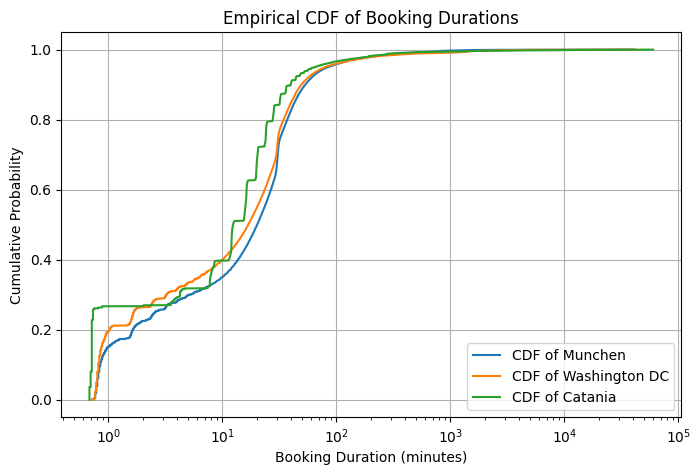

In [74]:


n = []
cumulative_probabilities = []
# Step 2: Calculate cumulative probabilities
for i in range(3):
    n.append(len(sorted_durations[i]))
    cumulative_probabilities.append(np.arange(1, n[i] + 1) / n[i])

# Step 3: Plot the empirical CDF
plt.figure(figsize=(8, 5))
for idx, i in enumerate(cities):
    plt.plot(sorted_durations[idx], cumulative_probabilities[idx], label=f"CDF of {i}")


# Labels and Title
plt.xlabel("Booking Duration (minutes)")
plt.ylabel("Cumulative Probability")
plt.title("Empirical CDF of Booking Durations")
plt.semilogx()
plt.legend()
plt.grid(True)
plt.show()

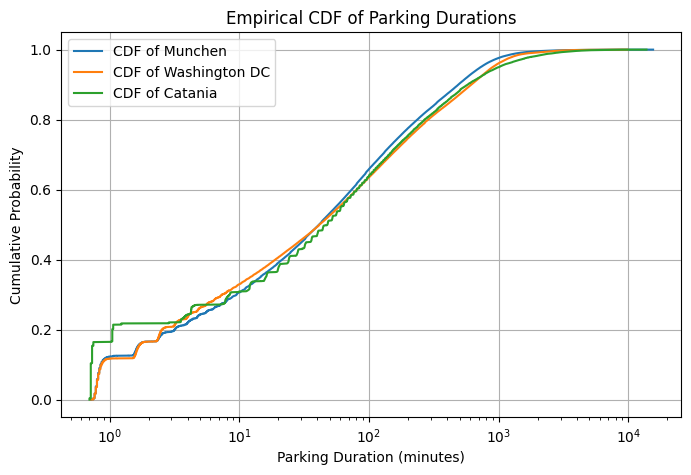

In [76]:
n = []
cumulative_probabilities = []
# Step 2: Calculate cumulative probabilities
for i in range(3):
    n.append(len(sorted_durations_p[i]))
    cumulative_probabilities.append(np.arange(1, n[i] + 1) / n[i])

# Step 3: Plot the empirical CDF
plt.figure(figsize=(8, 5))
for idx, i in enumerate(cities):
    plt.plot(sorted_durations_p[idx], cumulative_probabilities[idx], label=f"CDF of {i}")


# Labels and Title
plt.xlabel("Parking Duration (minutes)")
plt.ylabel("Cumulative Probability")
plt.title("Empirical CDF of Parking Durations")
plt.semilogx()
plt.legend()
plt.grid(True)
plt.show()

In [18]:
for i in range(3):
    print(len(sorted_durations[i]))

201777
150084
24910


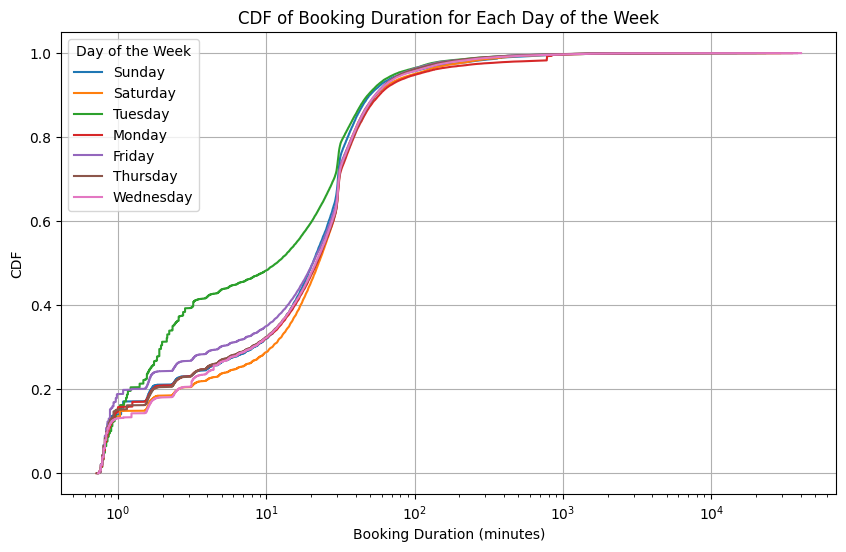

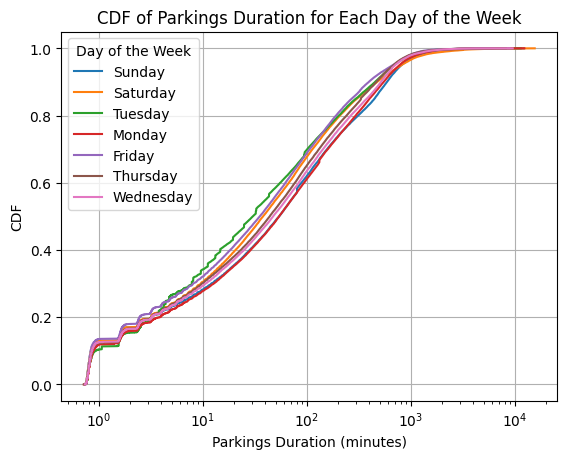

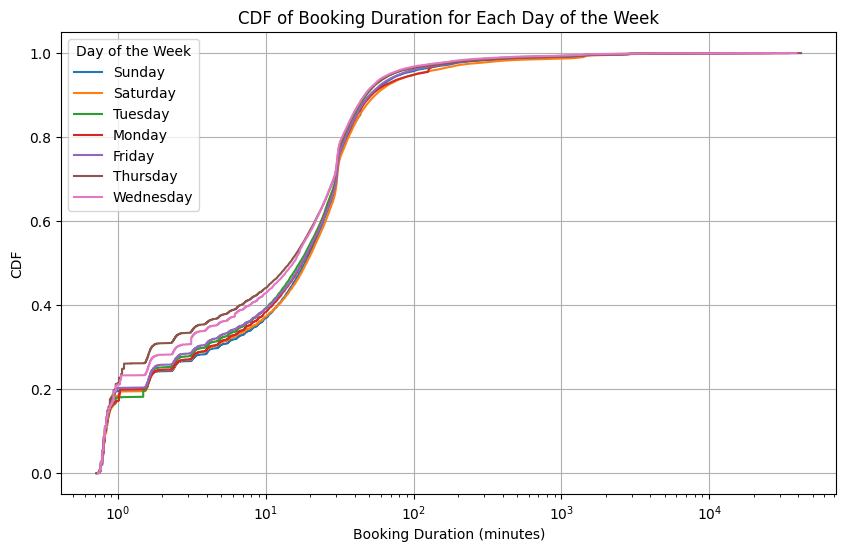

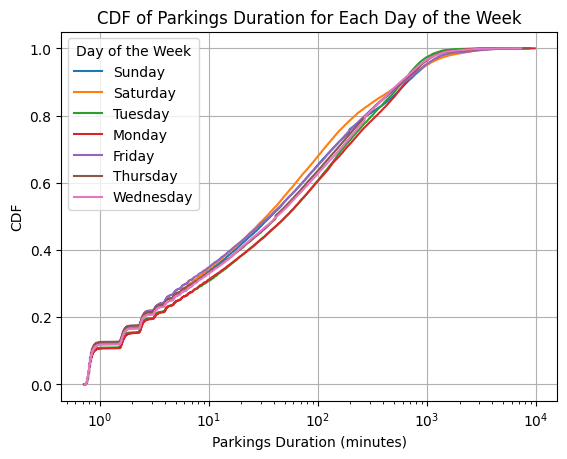

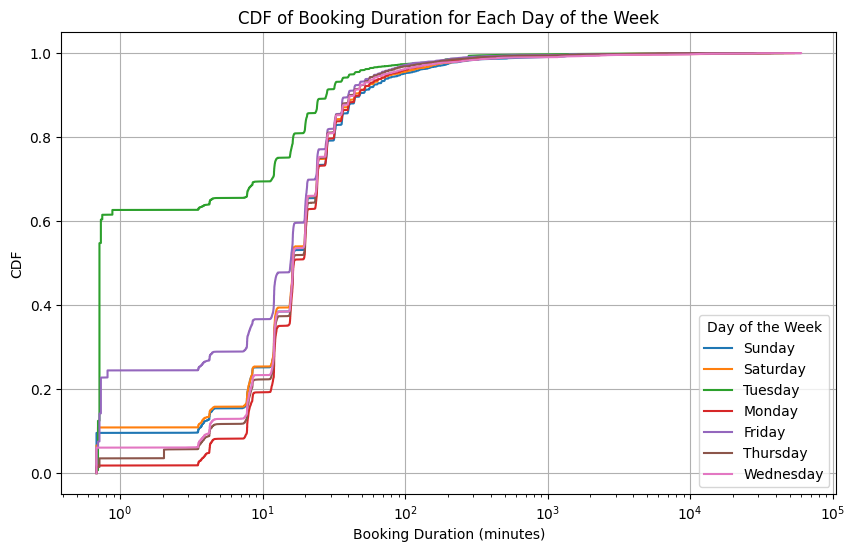

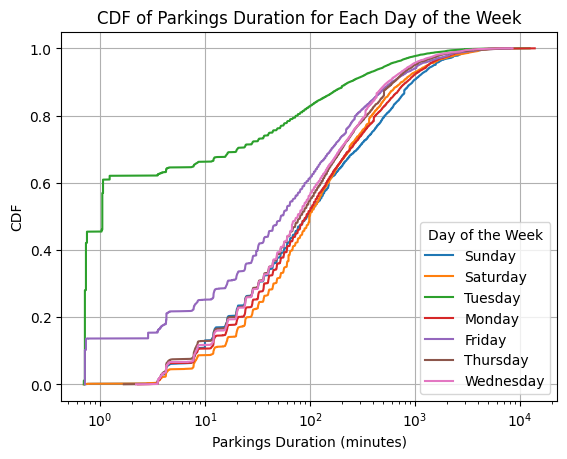

In [83]:

start_date = datetime(2017, 11, 1)
end_date = datetime(2018, 1, 31)

for i in range(3):
    city = cities[i]
    pipeline = [
        # Step 1: Calculate the duration in minutes
        {
            "$match": {
                "city": city,
                "init_date": {
                    "$gte": start_date,  # Greater than or equal to start_date
                    "$lte": end_date  # Less than or equal to end_date
                }
            }
        },
        {
            "$addFields": {
                "duration_minutes": {
                    "$divide": [
                        { "$subtract": ["$final_time", "$init_time"] },
                        60  # Convert milliseconds to minutes
                    ]
                }
            }
        },
        #{
        #"$match": {
        #    "duration_minutes": {
        #        "$gte": 3,
        #        "$lte": 100
        #        }
        #    }
        #},
        # Step 2: Extract day of the week from init_time
        {
            "$addFields": {
                "day_of_week": { "$dayOfWeek": "$init_date" }
            }
        },
        # Step 3: Group by day of the week, accumulating all durations in arrays
        {
            "$group": {
                "_id": "$day_of_week",
                "durations": { "$push": "$duration_minutes" }
            }
        }
    ]
    if city == "Catania":
        results = list(db["enjoy_PermanentBookings"].aggregate(pipeline))
        results_p = list(db["enjoy_PermanentParkings"].aggregate(pipeline))
    else:
        results = list(db["PermanentBookings"].aggregate(pipeline))
        results_p = list(db["PermanentParkings"].aggregate(pipeline))


    # Map MongoDB day_of_week values to readable day names
    day_map = {1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday'}

    # Prepare to plot CDF for each day of the week
    plt.figure(figsize=(10, 6))

    for result in results:
        day_name = day_map[result["_id"]]
        durations = sorted(result["durations"])
        
        # Calculate the CDF values
        cdf_values = np.arange(1, len(durations) + 1) / len(durations)
        
        # Plot the CDF for this day
        plt.plot(durations, cdf_values, label=day_name)

    # Set plot labels and legend
    plt.xlabel("Booking Duration (minutes)")
    plt.ylabel("CDF")
    plt.title("CDF of Booking Duration for Each Day of the Week")
    plt.legend(title="Day of the Week")
    plt.semilogx()
    plt.grid(True)
    plt.show()
    
    for result in results_p:
        day_name = day_map[result["_id"]]
        durations = sorted(result["durations"])
        
        # Calculate the CDF values
        cdf_values = np.arange(1, len(durations) + 1) / len(durations)
        
        # Plot the CDF for this day
        plt.plot(durations, cdf_values, label=day_name)

    # Set plot labels and legend
    plt.xlabel("Parkings Duration (minutes)")
    plt.ylabel("CDF")
    plt.title("CDF of Parkings Duration for Each Day of the Week")
    plt.legend(title="Day of the Week")
    plt.semilogx()
    plt.grid(True)
    plt.show()

In [84]:
import pandas as pd
def ut_hour_day(title, Bookings, Parkings):
    listBookings = list(Bookings)
    DFBookings = pd.DataFrame(listBookings)
    listParkings = list(Parkings)
    DFParkings = pd.DataFrame(listParkings)
    labels = []
    ticks = []
    
    if DFBookings.empty or DFParkings.empty:
        print(f"No data available for {title}")
        return
    


    for i in range(DFBookings.shape[0]):
        if i == (DFBookings.shape[0] - 1):
            break
        elif (DFBookings["_id"][i]["hour"] == 0) or ((DFBookings["_id"][i + 1]["dow"] - DFBookings["_id"][i]["dow"]) != 0) and ((DFBookings["_id"][i + 1]["dow"] - DFBookings["_id"][i]["dow"]) != 1):
            ticks.append(i)
            formatted_date = day_of_year_to_date(DFBookings["_id"][i + 1]["dow"], 2017)
            labels.append(formatted_date)

    print("DFBookings Columns:", DFBookings.columns)
    print("DFParkings Columns:", DFParkings.columns)

    print("DFBookings Shape:", DFBookings.shape)
    print("DFParkings Shape:", DFParkings.shape)
    plt.figure()
    plt.xlabel("Days of December")
    plt.ylabel("N. of Bookings/parkings")
    plt.title(title)
    plt.plot(DFBookings["PermanentBookings"], label="Bookings")
    plt.plot(DFParkings["PermanentParkings"], label="Parkings")
    plt.xticks(ticks=ticks, labels=labels)
    plt.legend(loc='best')
    plt.grid(True, which="both")
    plt.show()

In [24]:
import pandas as pd
date_init = datetime.strptime('2017-12-01T00:00:00', '%Y-%m-%dT%H:%M:%S')
# date_init_Denver = datetime.strptime('2017-12-01T07:00:00', '%Y-%m-%dT%H:%M:%S')
date_finish = datetime.strptime('2017-12-31T23:59:59', '%Y-%m-%dT%H:%M:%S')
# date_finish_Denver = datetime.strptime('2017-12-31T17:59:59', '%Y-%m-%dT%H:%M:%S')
init_unix = (date_init - datetime(1970, 1, 1)).total_seconds()
finish_unix = (date_finish - datetime(1970, 1, 1)).total_seconds()
Bookings = db["PermanentBookings"]
Parkings = db["PermanentParkings"]
cities = ["Munchen", "Washington DC", "Catania"]
Hour_Day_Aggregation = {}
for city in cities:
    if city == "Catania":
        Bookings = db["enjoy_PermanentBookings"]
        Parkings = db["enjoy_PermanentParkings"]
    Hour_Day_Aggregation['Bookings{0}'.format(city)] =Bookings.aggregate([
        {"$match": {
            "city": city,
            "init_time": {"$gte": init_unix, "$lte": finish_unix}
        }},
        {"$project": {
            "dow": {"$dayOfYear": "$init_date"},
            "hour": {"$hour": "$init_date"}
        }},
        {"$group": {
            "_id": {"dow": "$dow", "hour": "$hour"},
            "PermanentBookings": {"$sum": 1}
        }},
        {"$sort": {
            "_id": 1
        }}
    ])

    Hour_Day_Aggregation['Parkings{0}'.format(city)] = Parkings.aggregate([
        {"$match": {
            "city": city,
            "init_time": {"$gte": init_unix, "$lte": finish_unix}
        }},
        {"$project": {
            "dow": {"$dayOfYear": "$init_date"},
            "hour": {"$hour": "$init_date"},
            "data": "$init_date"
        }},
        {"$group": {
            "_id": {"dow": "$dow", "hour": "$hour"},
            "PermanentParkings": {"$sum": 1}
        }},
        {"$sort": {
            "_id": 1
        }}
    ])

    ut_hour_day(city, Hour_Day_Aggregation['Bookings' + city], Hour_Day_Aggregation['Parkings' + city])


NameError: name 'day_of_year_to_date' is not defined

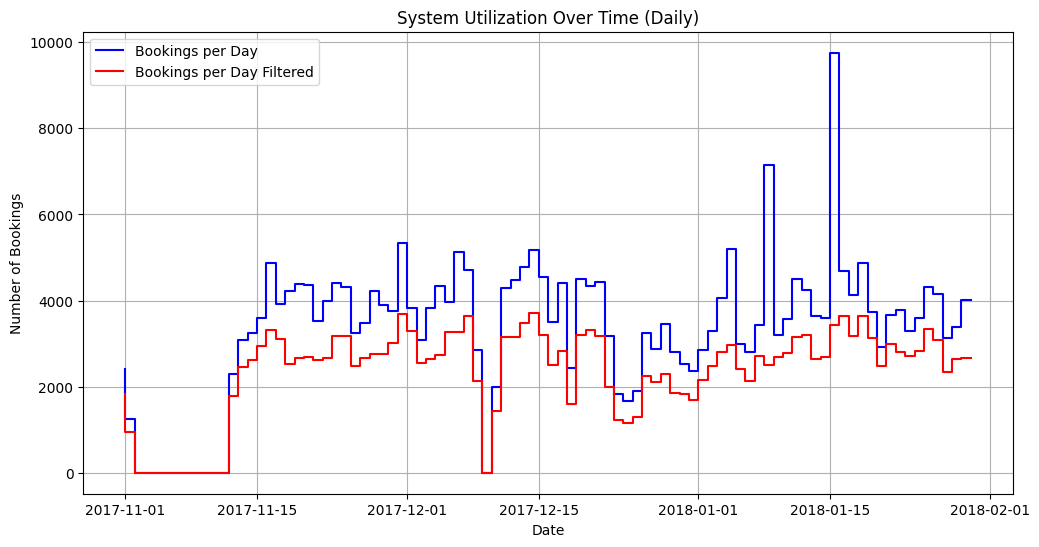

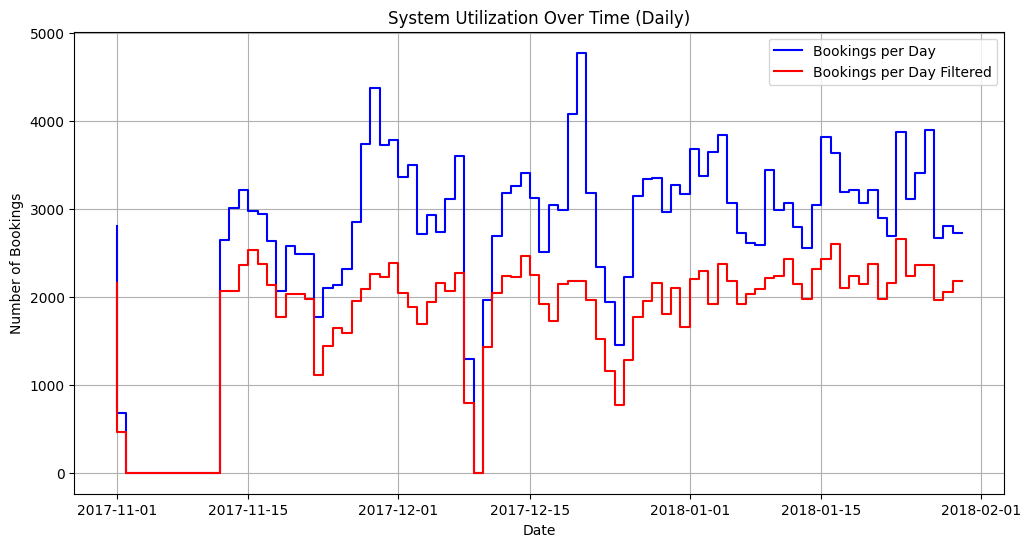

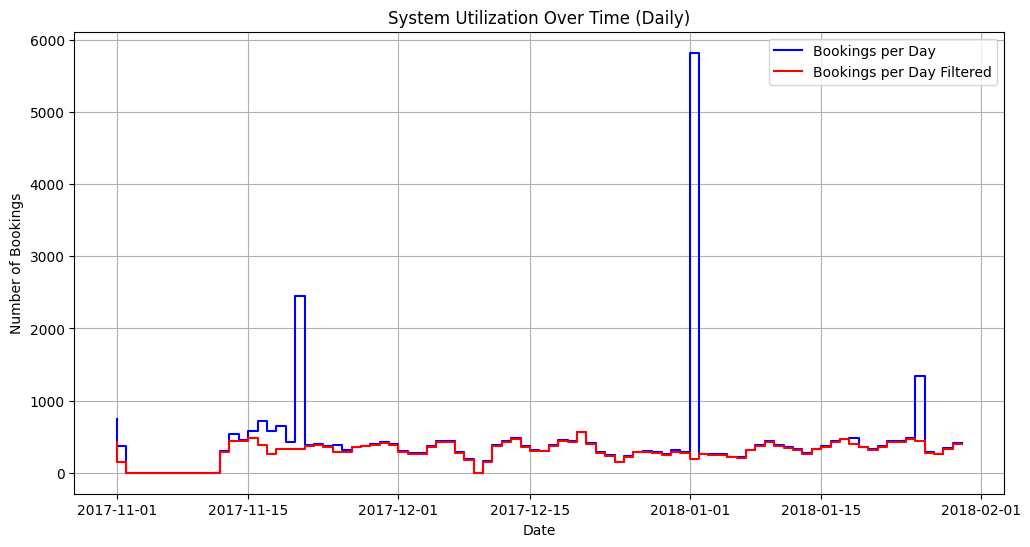

In [ ]:
for i in cities:
    if i == "Catania":
        data = list(db["enjoy_PermanentBookings"].find({"city": i,"init_date": {"$gte": start_date, "$lt": end_date}}))  # Modify fields as needed
    else:
        data = list(db["PermanentBookings"].find({"city": i,"init_date": {"$gte": start_date, "$lt": end_date}}))  # Modify fields as needed

    df = pd.DataFrame(data)
    df["duration"] = (df['final_time'] - df['init_time'])/60
    
    filtered_df = df[(df['duration'] >= 3) & (df['duration'] <= 120)] 
    # Set 'date' as the index
    df.set_index('init_date', inplace=True)
    filtered_df.set_index('init_date', inplace=True)

    daily_utilization = df.resample('D').size()  # 'D' resamples by day
    daily_utilization_f = filtered_df.resample('D').size()  # 'D' resamples by day
    plt.figure(figsize=(12, 6))
    plt.step(daily_utilization.index, daily_utilization.values, label="Bookings per Day", color='b')
    plt.step(daily_utilization_f.index, daily_utilization_f.values, label="Bookings per Day Filtered", color='r')
    plt.xlabel("Date")
    plt.ylabel("Number of Bookings")
    plt.title("System Utilization Over Time (Daily)")
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
#question 6

public =list(db["enjoy_PermanentBookings"].find({"city": "Milano",
"public_transport.distance": {"$ne": -1}, # {"$ne": -1}: Ensures that the duration is also recorded (not equal to -1).
"public_transport.duration": {"$ne": -1},
"public_transport.arrival_time":{"$ne": -1} 
})) 

print(f"Numer of rentals: {len(public)}")

for doc in public[:5]:
    print(doc)

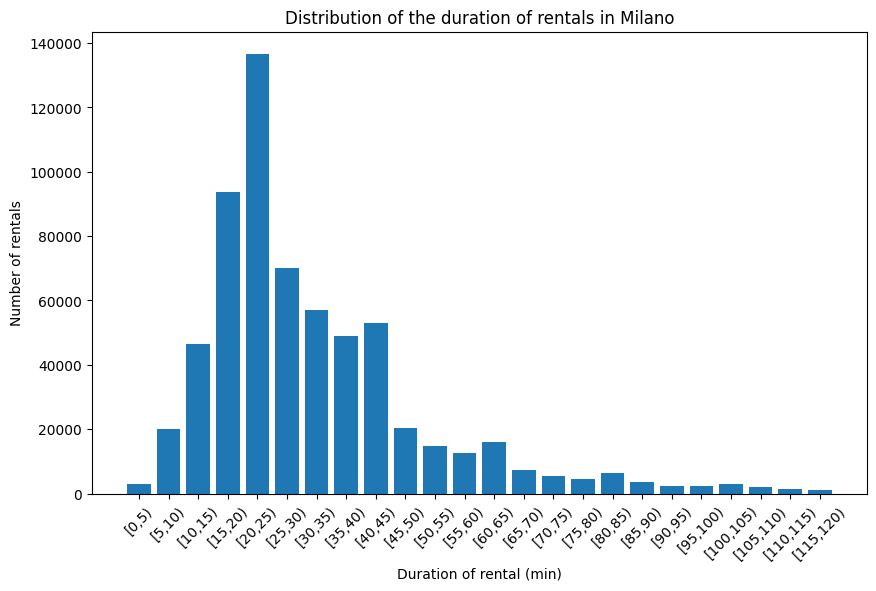

In [ ]:



time_bins = np.arange(0, 125, 5).tolist() 
pipeline = [
    {"$match": {
        "city": "Milano",
        "public_transport.distance": {"$ne": -1}, 
        "public_transport.duration": {"$ne": -1},
        "public_transport.arrival_time":{"$ne": -1},
        "$expr": {
            "$ne": [
                {"$arrayElemAt": ["$origin_destination.coordinates", 0]},  # Filter to see if the position change
                {"$arrayElemAt": ["$origin_destination.coordinates", 1]}   
            ]
        }
    }},
    
    {"$project": {
        "duration_minutes": {
            "$divide": [
                {"$subtract": ["$final_time", "$init_time"]},
                60
            ]
        }
    }},
    
    #  divide the each rental for its durations (bins)
    {"$bucket": {
        "groupBy": "$duration_minutes",
        "boundaries": time_bins,
        "default": "Out of range",  #values> 100 min
        "output": {
            "count": {"$sum": 1}  # count number of documents
        }
    }}
]


public_t = list(db["enjoy_PermanentBookings"].aggregate(pipeline))

durations = [p["_id"] for p in public_t if p["_id"]!= "Out of range"]
rentals = [p["count"] for p in public_t if p["_id"]!= "Out of range"]
plt.figure(figsize=(10, 6))
plt.bar(durations, rentals, width=4)
plt.xlabel("Duration of rental (min)")
plt.ylabel("Number of rentals")
plt.title("Distribution of the duration of rentals in Milano")
plt.xticks(ticks=durations, labels=[f"[{d},{d+5})" for d in durations], rotation=45)# used to aggregate the intervals in (0,5) - (5,1)..
plt.show()

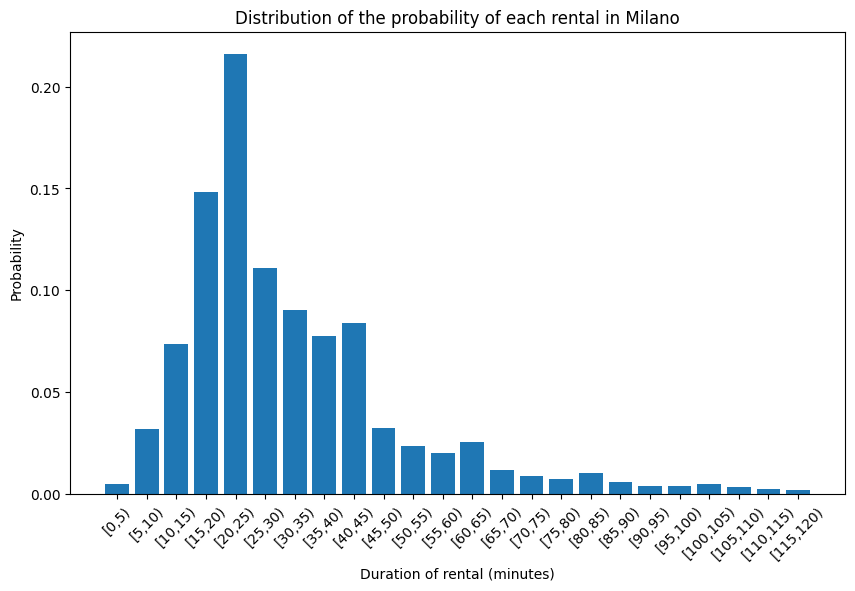

In [ ]:
total_rentals = sum(rentals)
prob=[]
for i in rentals:
    prob.append(i/total_rentals)

plt.figure(figsize=(10, 6))
plt.bar(durations, prob, width=4)
plt.xlabel("Duration of rental (minutes)")
plt.ylabel("Probability")
plt.title("Distribution of the probability of each rental in Milano")
plt.xticks(ticks=durations, labels=[f"[{d},{d+5})" for d in durations], rotation=45)# used to aggregate the intervals in (0,5) - (5,1)..
plt.show()

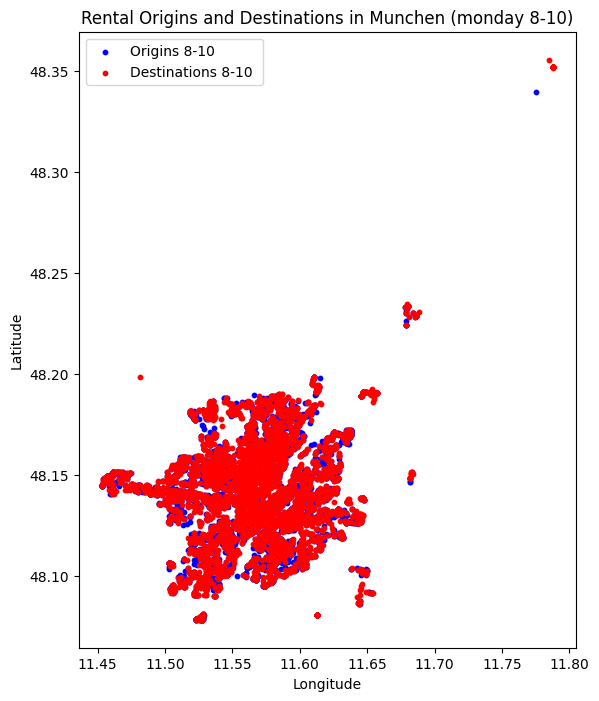

In [ ]:
#7
#a
days = ["Sunday","monday","thuesday","wednesday","thursday","friday","saturday"]
pipeline = [
    {"$match": {
        "city": "Munchen" 
    }},
    {"$addFields": {
        "init_day": {"$dayOfWeek": "$init_date"},
        "init_hour": {"$hour": "$init_date"},
        "final_hour": {"$hour": "$final_date"}
    }},
    {"$match": {
        "init_day": 1,  # Monday change here to see different distribution
        "$or": [
            {"init_hour": {"$gte": 8, "$lt": 10}},  # 8-10 
            {"init_hour": {"$gte": 18, "$lt": 20}}  # 18-20
        ]
    }},
    {"$project": {
        "init_coords": {"$arrayElemAt": ["$origin_destination.coordinates", 0]},
        "final_coords": {"$arrayElemAt": ["$origin_destination.coordinates", 1]},
        "init_date": 1,
        "final_date": 1
    }}
]

# Execute the pipeline
data = list(db["PermanentBookings"].aggregate(pipeline))

coords_8_10 = {"origins": [], "destinations": []}
coords_18_20 = {"origins": [], "destinations": []}

# Organize data by time of day
for i in data:
    init_hour = i["init_date"].hour
    if 8 <= init_hour < 10:
        coords_8_10["origins"].append(i["init_coords"])
        coords_8_10["destinations"].append(i["final_coords"])
    elif 18 <= init_hour < 20:
        coords_18_20["origins"].append(i["init_coords"])
        coords_18_20["destinations"].append(i["final_coords"])

# Create GeoDataFrames
origins_x_8_10 = [coord[0] for coord in coords_8_10["origins"]]
origins_y_8_10 = [coord[1] for coord in coords_8_10["origins"]]
destinations_x_8_10 = [coord[0] for coord in coords_8_10["destinations"]]
destinations_y_8_10 = [coord[1] for coord in coords_8_10["destinations"]]

origins_x_18_20 = [coord[0] for coord in coords_18_20["origins"]]
origins_y_18_20 = [coord[1] for coord in coords_18_20["origins"]]
destinations_x_18_20 = [coord[0] for coord in coords_18_20["destinations"]]
destinations_y_18_20 = [coord[1] for coord in coords_18_20["destinations"]]

# Create GeoDataFrames
origins_gdf_8_10 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(origins_x_8_10, origins_y_8_10), crs="EPSG:4326")
destinations_gdf_8_10 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(destinations_x_8_10, destinations_y_8_10), crs="EPSG:4326")

origins_gdf_18_20 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(origins_x_18_20, origins_y_18_20), crs="EPSG:4326")
destinations_gdf_18_20 = gpd.GeoDataFrame(geometry=gpd.points_from_xy(destinations_x_18_20, destinations_y_18_20), crs="EPSG:4326")

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

origins_gdf_8_10.plot(ax=ax, color="blue", marker="o", label="Origins 8-10 ", markersize=10)
destinations_gdf_8_10.plot(ax=ax, color="red", marker="o", label="Destinations 8-10 ", markersize=10)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Rental Origins and Destinations in Munchen ({days[1]} 8-10)")
plt.show()

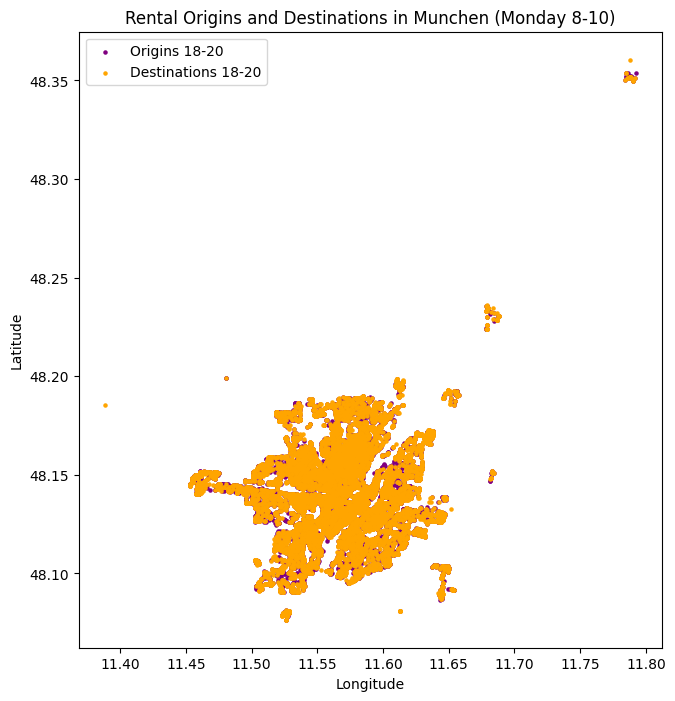

In [ ]:
#for 18-20 

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

origins_gdf_18_20.plot(ax=ax, color="purple", marker="o", label="Origins 18-20 ", markersize=5)
destinations_gdf_18_20.plot(ax=ax, color="orange", marker="o", label="Destinations 18-20", markersize=5)
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Rental Origins and Destinations in Munchen (Monday 8-10)")
plt.show()

In [ ]:
#7b
import math
import numpy as np

# coordinates
min_lon = min(origins_gdf_8_10.geometry.x.min(), destinations_gdf_8_10.geometry.x.min())
max_lon = max(origins_gdf_8_10.geometry.x.max(), destinations_gdf_8_10.geometry.x.max())
min_lat = min(origins_gdf_8_10.geometry.y.min(), destinations_gdf_8_10.geometry.y.min())
max_lat = max(origins_gdf_8_10.geometry.y.max(), destinations_gdf_8_10.geometry.y.max())

# definition rectangle
bottomLeft, bottomRight = (min_lat, min_lon), (min_lat, max_lon)
topLeft, topRight = (max_lat, min_lon), (max_lat, max_lon)


# zones
Number_zones_total = 500
x = int(math.sqrt(Number_zones_total)) + 1
cols = np.linspace(bottomLeft[1], bottomRight[1], num=x)
rows = np.linspace(bottomLeft[0], topLeft[0], num=x)

# assign origins and destitations the zones
origins_gdf_8_10['col'] = np.searchsorted(cols, origins_gdf_8_10.geometry.x)
origins_gdf_8_10['row'] = np.searchsorted(rows, origins_gdf_8_10.geometry.y)
origins_gdf_8_10['zone_id'] = origins_gdf_8_10['row'].astype(str) + origins_gdf_8_10['col'].astype(str)

destinations_gdf_8_10['col'] = np.searchsorted(cols, destinations_gdf_8_10.geometry.x)
destinations_gdf_8_10['row'] = np.searchsorted(rows, destinations_gdf_8_10.geometry.y)
destinations_gdf_8_10['zone_id'] = destinations_gdf_8_10['row'].astype(str) + destinations_gdf_8_10['col'].astype(str)
#zone
res_origin = origins_gdf_8_10.groupby(['row', 'col', 'zone_id']).size().reset_index(name='count_origin')
sum_origin = res_origin["count_origin"].sum()
res_origin["prob_origin"] = res_origin["count_origin"] / sum_origin

res_dest = destinations_gdf_8_10.groupby(['row', 'col', 'zone_id']).size().reset_index(name='count_destination')
sum_destination = res_dest["count_destination"].sum()
res_dest["prob_destination"] = res_dest["count_destination"] / sum_destination

# dataframe 
trip_generation = res_origin.merge(res_dest, on=['row', 'col', 'zone_id'], how='outer').fillna(0)

# limit 
trip_generation["lon_min"] = cols[trip_generation["col"] - 1]
trip_generation["lon_max"] = cols[trip_generation["col"]]
trip_generation["lat_min"] = rows[trip_generation["row"] - 1]
trip_generation["lat_max"] = rows[trip_generation["row"]]

# poligons
trip_generation['geometry'] = trip_generation.apply(
    lambda row: Polygon([
        (row.lon_min, row.lat_min),
        (row.lon_max, row.lat_min),
        (row.lon_max, row.lat_max),
        (row.lon_min, row.lat_max)
    ]),
    axis=1
)


gdf_gen = gpd.GeoDataFrame(trip_generation, geometry="geometry", crs="EPSG:4326")

gdf_gen_origin_8_10 = gdf_gen[['geometry', 'prob_origin']].copy()
gdf_gen_origin_8_10.explore(
    column='prob_origin',
    cmap='cividis',
    tooltip='prob_origin',
    legend=True,
    legend_kwds={'caption': 'Origins 8-10'}
)





In [ ]:
gdf_gen_destinations_8_10 = gdf_gen[['geometry', 'prob_destination']].copy()
gdf_gen_destinations_8_10.explore(
    column='prob_destination',
    cmap='cividis',
    tooltip='prob_destination',
    legend=True,
    legend_kwds={'caption': 'Destinations 8-10'}
)

In [ ]:
# coordinates
min_lon = min(origins_gdf_18_20.geometry.x.min(), destinations_gdf_18_20.geometry.x.min())
max_lon = max(origins_gdf_18_20.geometry.x.max(), destinations_gdf_18_20.geometry.x.max())
min_lat = min(origins_gdf_18_20.geometry.y.min(), destinations_gdf_18_20.geometry.y.min())
max_lat = max(origins_gdf_18_20.geometry.y.max(), destinations_gdf_18_20.geometry.y.max())

# definition rectangle
bottomLeft, bottomRight = (min_lat, min_lon), (min_lat, max_lon)
topLeft, topRight = (max_lat, min_lon), (max_lat, max_lon)


# zones
Number_zones_total = 500
x = int(math.sqrt(Number_zones_total)) + 1
cols = np.linspace(bottomLeft[1], bottomRight[1], num=x)
rows = np.linspace(bottomLeft[0], topLeft[0], num=x)

# assign origins and destitations the zones
origins_gdf_18_20['col'] = np.searchsorted(cols, origins_gdf_18_20.geometry.x)
origins_gdf_18_20['row'] = np.searchsorted(rows, origins_gdf_18_20.geometry.y)
origins_gdf_18_20['zone_id'] = origins_gdf_18_20['row'].astype(str) + origins_gdf_18_20['col'].astype(str)

destinations_gdf_18_20['col'] = np.searchsorted(cols, destinations_gdf_18_20.geometry.x)
destinations_gdf_18_20['row'] = np.searchsorted(rows, destinations_gdf_18_20.geometry.y)
destinations_gdf_18_20['zone_id'] = destinations_gdf_18_20['row'].astype(str) + destinations_gdf_18_20['col'].astype(str)
#zone
res_origin = origins_gdf_18_20.groupby(['row', 'col', 'zone_id']).size().reset_index(name='count_origin')
sum_origin = res_origin["count_origin"].sum()
res_origin["prob_origin"] = res_origin["count_origin"] / sum_origin

res_dest = destinations_gdf_18_20.groupby(['row', 'col', 'zone_id']).size().reset_index(name='count_destination')
sum_destination = res_dest["count_destination"].sum()
res_dest["prob_destination"] = res_dest["count_destination"] / sum_destination

# dataframe 
trip_generation = res_origin.merge(res_dest, on=['row', 'col', 'zone_id'], how='outer').fillna(0)

# limit 
trip_generation["lon_min"] = cols[trip_generation["col"] - 1]
trip_generation["lon_max"] = cols[trip_generation["col"]]
trip_generation["lat_min"] = rows[trip_generation["row"] - 1]
trip_generation["lat_max"] = rows[trip_generation["row"]]

# poligons
trip_generation['geometry'] = trip_generation.apply(
    lambda row: Polygon([
        (row.lon_min, row.lat_min),
        (row.lon_max, row.lat_min),
        (row.lon_max, row.lat_max),
        (row.lon_min, row.lat_max)
    ]),
    axis=1
)

gdf_gen = gpd.GeoDataFrame(trip_generation, geometry="geometry", crs="EPSG:4326")

gdf_gen_origin_18_20 = gdf_gen[['geometry', 'prob_origin']].copy()
gdf_gen_origin_18_20.explore(
    column='prob_origin',
    cmap='cividis',
    tooltip='prob_origin',
    legend=True,
    legend_kwds={'caption': 'Origins 18-20'}
)


In [ ]:
gdf_gen_origin_18_20 = gdf_gen[['geometry', 'prob_destination']].copy()
gdf_gen_origin_18_20.explore(
    column='prob_destination',
    cmap='cividis',
    tooltip='prob_destination',
    legend=True,
    legend_kwds={'caption': 'Destinations 18-20'}
)